### Load and Display Dataset

In [2]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Loading digits dataset
digits = load_digits()
X, y = digits.data, digits.target
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}\n")

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X.shape: (1797, 64)
y.shape: (1797,)

X_train.shape: (1297, 64)
X_test.shape: (500, 64)
y_train.shape: (1297,)
y_test.shape: (500,)


### Visualize Data

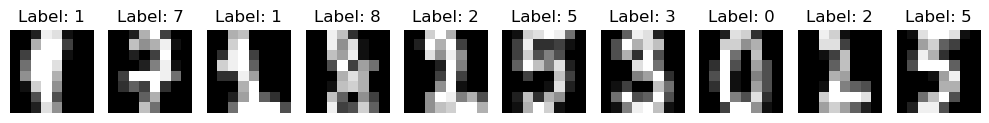

In [4]:
# Selecting 10 random indexes
i = np.random.choice(len(X_train), size=10, replace=False)
images = X_train[i]
labels = y_train[i]

# Displaying Images
grid, axes = plt.subplots(1, 10, figsize=(10, 5))
for axis, image, label in zip(axes.ravel(), images, labels):
    axis.imshow(image.reshape(8, 8), cmap='gray')
    axis.set_title(f"Label: {label}")
    axis.axis('off')
plt.tight_layout()
plt.show()

### Train and Fit KNN Model

In [6]:
# Create and train 5 different classifiers
classifier_1 = KNeighborsClassifier(n_neighbors=1)
classifier_1.fit(X_train, y_train)

classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_3.fit(X_train, y_train)

classifier_5 = KNeighborsClassifier(n_neighbors=5)
classifier_5.fit(X_train, y_train)

classifier_7 = KNeighborsClassifier(n_neighbors=7)
classifier_7.fit(X_train, y_train)

classifier_9 = KNeighborsClassifier(n_neighbors=9)
classifier_9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### Evaluating Classifiers

In [8]:
# Make each classifier predict labels based on test data, then calculate the f1 score
predicted_1 = classifier_1.predict(X_test)
f1_1 = f1_score(y_test, predicted_1, average='weighted')

predicted_3 = classifier_3.predict(X_test)
f1_3 = f1_score(y_test, predicted_3, average='weighted')

predicted_5 = classifier_5.predict(X_test)
f1_5 = f1_score(y_test, predicted_5, average='weighted')

predicted_7 = classifier_7.predict(X_test)
f1_7 = f1_score(y_test, predicted_7, average='weighted')

predicted_9 = classifier_9.predict(X_test)
f1_9 = f1_score(y_test, predicted_9, average='weighted')

scores = {f1_1, f1_3, f1_5, f1_7, f1_9}
print(scores)

{0.9879934981670309, 0.98403449883044, 0.9759647383734142, 0.9758853258962866, 0.9839919939192158}


| **K**        | 1                  | 3                  | 5                  | 7                  | 9                  |
|--------------|--------------------|--------------------|--------------------|--------------------|--------------------|
| **F1 Score** | 0.9879934981670309 | 0.98403449883044 | 0.9759647383734142 | 0.9758853258962866 | 0.9839919939192158 |

All of the classifiers perform pretty well, never really dropping below a 0.95 F1 Score and usually averaging around a score of 0.98. Depending on how the data is split, different classifier can perform better than others. In the currently displayed test, the classifier using 1 nearest neighbor performed the best, although over multiple tests I've seen each classifier manage to perform the best. It's possible certain k values perform better when specific labels are more present in the testing/training data.

### Visualizing Predictions

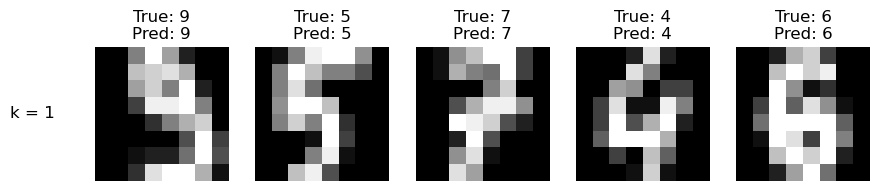

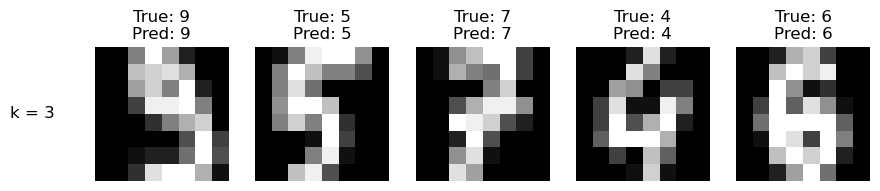

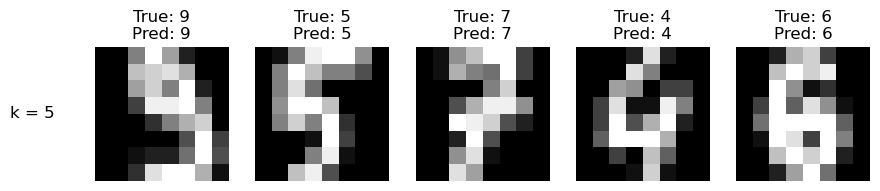

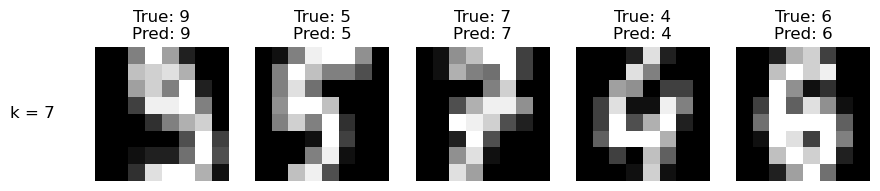

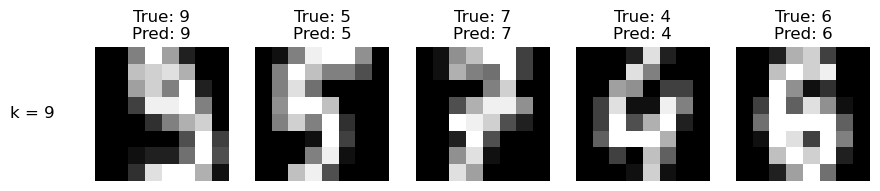

In [22]:
# Pick 5 random indexes
i = np.random.choice(len(X_test), size=5, replace=False)

# Make a row for each classifier
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for axis, j in zip(axes, i):
    image = X_test[j].reshape(8, 8)
    true = y_test[j]
    pred = classifier_1.predict([X_test[j]])[0]
    axis.imshow(image, cmap='gray')
    axis.set_title(f"True: {true}\nPred: {pred}")
    axis.axis('off')
fig.text(0.04, 0.5, "k = 1", va='center', ha='left', fontsize=12)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for axis, j in zip(axes, i):
    image = X_test[j].reshape(8, 8)
    true = y_test[j]
    pred = classifier_3.predict([X_test[j]])[0]
    axis.imshow(image, cmap='gray')
    axis.set_title(f"True: {true}\nPred: {pred}")
    axis.axis('off')
fig.text(0.04, 0.5, "k = 3", va='center', ha='left', fontsize=12)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for axis, j in zip(axes, i):
    image = X_test[j].reshape(8, 8)
    true = y_test[j]
    pred = classifier_5.predict([X_test[j]])[0]
    axis.imshow(image, cmap='gray')
    axis.set_title(f"True: {true}\nPred: {pred}")
    axis.axis('off')
fig.text(0.04, 0.5, "k = 5", va='center', ha='left', fontsize=12)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for axis, j in zip(axes, i):
    image = X_test[j].reshape(8, 8)
    true = y_test[j]
    pred = classifier_7.predict([X_test[j]])[0]
    axis.imshow(image, cmap='gray')
    axis.set_title(f"True: {true}\nPred: {pred}")
    axis.axis('off')
fig.text(0.04, 0.5, "k = 7", va='center', ha='left', fontsize=12)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for axis, j in zip(axes, i):
    image = X_test[j].reshape(8, 8)
    true = y_test[j]
    pred = classifier_9.predict([X_test[j]])[0]
    axis.imshow(image, cmap='gray')
    axis.set_title(f"True: {true}\nPred: {pred}")
    axis.axis('off')
fig.text(0.04, 0.5, "k = 9", va='center', ha='left', fontsize=12)

# Display Figure
plt.show()

As you can see, with these 5 randomly selected images all 5 classifiers successfully predicted each one. This makes sense, as we saw all 5 classifiers had very high F1 scores, so incorrect classifications must be incredibly rare. This shows that using K-nearest neighbors is very effective for classification problems, so long as the dataset is not large enough to slow down the algorithms calculations.